# Projeto de Estatística II


## Parte II - Regressão Logística e Hipóteses mais complexas

-------------------------------

**Instruções:**

- A segunda parte do projeto engloba a avaliação dos tópicos de Regressão Logística e Hipóteses mais complexas.
- Ela deve ser entregue até o dia 05/09/2022.
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteII.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

1. Treine um um modelo de regressão logística para o dataset 'Pima Indians Diabetes Database' (diabetes.csv) com o objetivo de prever diagnosticamente se um paciente tem ou não diabetes. Maiores detalhes sobre o dataset podem ser encontrados [aqui](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

In [68]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
# Iniciando análise dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Existem dados um pouco preocupantes nas colunas **Insulin** e **SkinThickness**. Muitos valores como 0 até o primeiro quartil. Por enquanto, apesar da preocupação, não farei nada com os dados.

In [71]:
# Verificando nulos
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [72]:
# Verificando dados duplicados
df.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f49620150c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4962015660>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4962014df0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f4962015c00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4962015ed0>,
 'means': []}

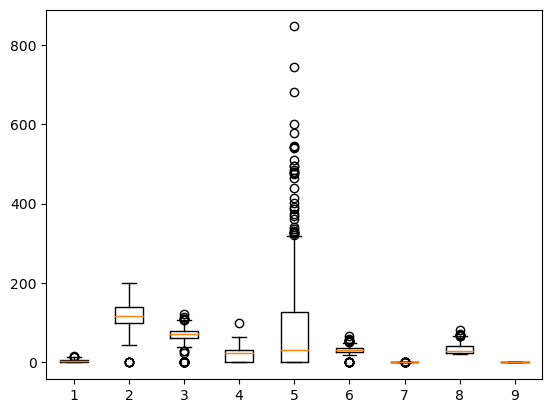

In [73]:
# Verificando outliers

import matplotlib.pyplot as plt

plt.boxplot(df)

In [74]:
# Removendo outliers

import numpy as np

for column in df.columns:
    # Pegando o primeiro e terceiro quantil
    x = np.quantile(df[column], [0.25, 0.75])
    
    # Calculando IQR
    iqr = x[1] - x[0]
    
    # Definindo os limites superior e inferior
    upper_bound = x[1] + 1.5*iqr
    lower_bound = x[0] - 1.5*iqr
    
    # Removendo os outliers
    df[column]  = np.where(df[column] > upper_bound, upper_bound,
                           (np.where(df[column] < lower_bound, lower_bound, df[column])))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4961f03790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4961f03d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4961f035e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f4961f2c310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4961f2c5e0>,
 'means': []}

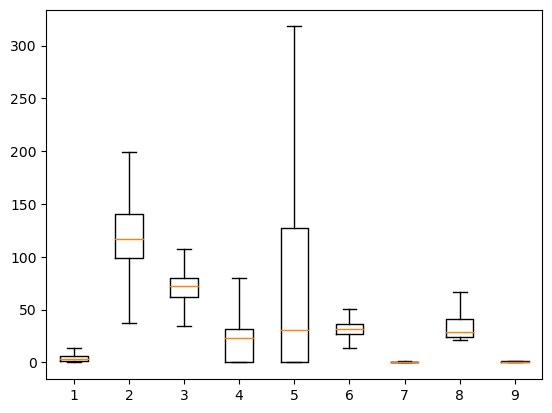

In [75]:
plt.boxplot(df)

<AxesSubplot:xlabel='Outcome', ylabel='Count'>

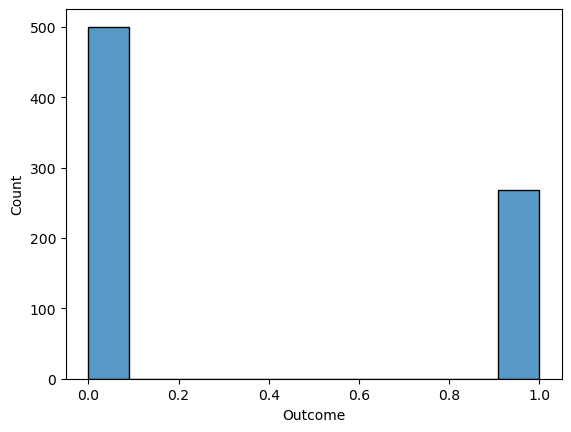

In [76]:
#Histograma do target
import seaborn as sns

sns.histplot(df, x="Outcome")

<AxesSubplot:title={'center':'count (target)'}>

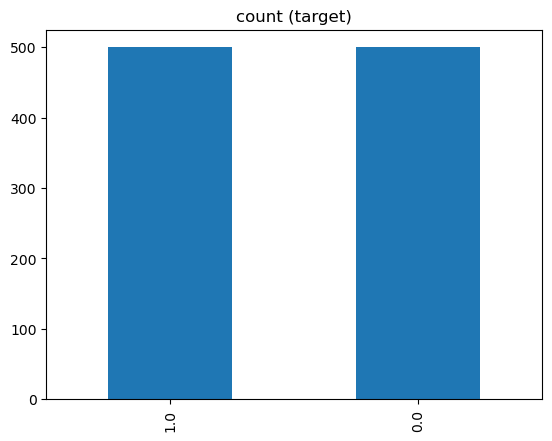

In [77]:
# Contando as classes
class_count_0, class_count_1 = df['Outcome'].value_counts()

# Separando as classes
class_0 = df[df['Outcome'] == 0]
class_1 = df[df['Outcome'] == 1]# print the shape of the class

# Pegando amostras aleatórias da classe 1
class_1_over = class_1.sample(class_count_0, replace=True, random_state=42)

# Remodelando o dataset
df = pd.concat([class_1_over, class_0], axis=0)

df['Outcome'].value_counts().plot(kind='bar', title='count (target)')

Aqui, decidimos rebalancear os dados inserindo dados aleatórios da classe 1. Isso pode acabar acarretando em overfitting, mas como estamos falando de um dataset com poucos dados imaginei que essa seria a melhor abordagem.

In [78]:
#Definindo X e y
X = df.drop(columns='Outcome')
y = df['Outcome']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Separando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciando o modelo com uma pipeline para escalonamento dos dados devido a baixa quantidade
# de dados
model = make_pipeline(StandardScaler(), LogisticRegression())

# Treinando o modelo
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

2. Após ter treinado o modelo, realize a sua avaliação com as ferramentas que foram apresentadas nas aulas.

In [79]:
model.score(X_test, y_test)

0.7533333333333333

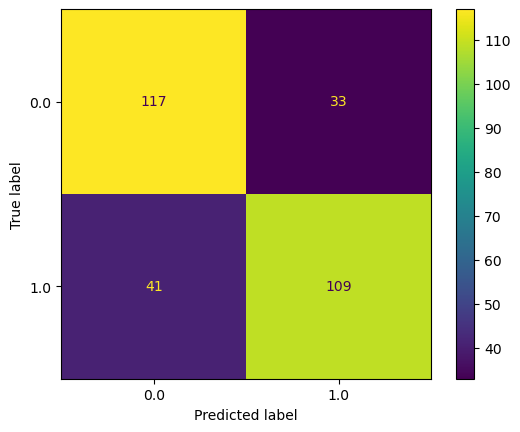

In [80]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay

y_predict = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       150
         1.0       0.77      0.73      0.75       150

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



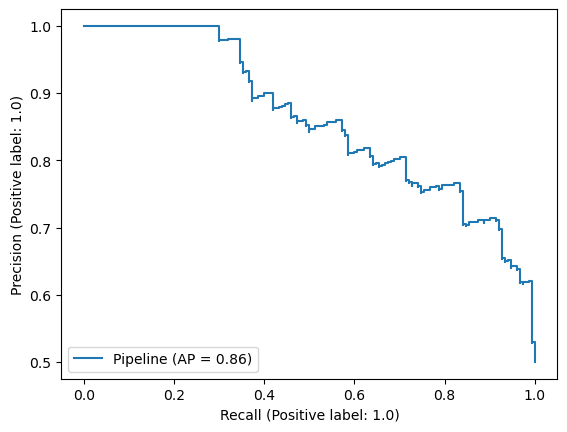

In [81]:
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)

print(classification_report(y_test, y_predict))

3. O cutoff default (0.5) retorna a maior acurácia? Qual é o cutoff que retorna o mesmo valor para o precision e o recall? Qual é esse valor?

In [82]:
from sklearn.metrics import precision_recall_curve

y_proba_1 = model.predict_proba(X_test)[:, 1]

# Obtendo as diferentes precisões e revocações
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_1)

# Inserindo os dados em um dataframe
precisions_recalls = pd.DataFrame(data={'precisions':precisions[:-1], 
                                        'recalls':recalls[:-1], 'thresholds':thresholds})

precisions_recalls

,precisions,recalls,thresholds
0,0.500000,1.000000,0.015748
1,0.501672,1.000000,0.024001
2,0.503356,1.000000,0.032193
3,0.505051,1.000000,0.045922
4,0.506757,1.000000,0.049776
...,...,...,...
248,1.000000,0.046667,0.945573
249,1.000000,0.033333,0.949978
250,1.000000,0.026667,0.955468
251,1.000000,0.013333,0.965488


In [83]:
precisions_recalls[precisions_recalls['precisions']>=0.8]

,precisions,recalls,thresholds
153,0.804511,0.713333,0.527768
154,0.801527,0.700000,0.530162
164,0.800000,0.640000,0.565318
165,0.806723,0.640000,0.569213
166,0.805085,0.633333,0.572225
...,...,...,...
248,1.000000,0.046667,0.945573
249,1.000000,0.033333,0.949978
250,1.000000,0.026667,0.955468
251,1.000000,0.013333,0.965488


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

_, _, thresholds = roc_curve(y_test, y_proba_1)
accuracy_scores = []
for thresh in thresholds:
    accuracy_scores.append(accuracy_score(y_test, [prob > thresh for prob in y_proba_1]))

accuracies = np.array(accuracy_scores)
max_accuracy = accuracies.max() 
max_accuracy_threshold =  thresholds[accuracies.argmax()]

print("Maior acurácia:", max_accuracy)
print("CutOff da respectiva acurácia:", max_accuracy_threshold)

Maior acurácia: 0.7833333333333333
CutOff da respectiva acurácia: 0.4549391071736502


In [85]:
# CutOff que retorna a mesma precisão e mesma revocação

precision_recall = precisions_recalls[precisions_recalls['precisions']==precisions_recalls['recalls']]
precision_recall.rename(columns={'precisions': 'Precision', 'recalls': 'Recall', 'thresholds': 'CufOff'})

,Precision,Recall,CufOff
137,0.753333,0.753333,0.475899


4. Crie um modelo de Regressão logistica para o mesmo dataset utilizando polynomial features com degree=2. Avalie o modelo e compare com o resultado do modelo anterior.

In [86]:
from sklearn.preprocessing import PolynomialFeatures

# Instanciando os polinomios de gray 2
pf = PolynomialFeatures(degree=2, include_bias=False)

# Fazendo a adequação dos dados
pf.fit(X_train)

# Transformando os dados de treino e teste
X_train_transf = pf.transform(X_train)
X_test_transf = pf.transform(X_test)

# Instanciando o modelo com a pipeline
model_poly = make_pipeline(StandardScaler(), LogisticRegression())

# Treinando o modelo
model_poly.fit(X_train_transf, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [87]:
model_poly.score(X_test_transf, y_test)

0.7433333333333333

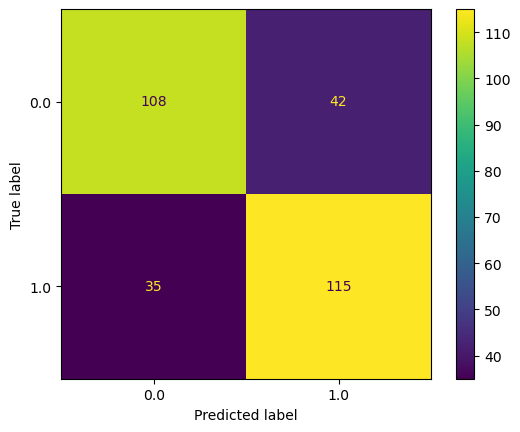

In [88]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay

y_predict = model_poly.predict(X_test_transf)

ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74       150
         1.0       0.73      0.77      0.75       150

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



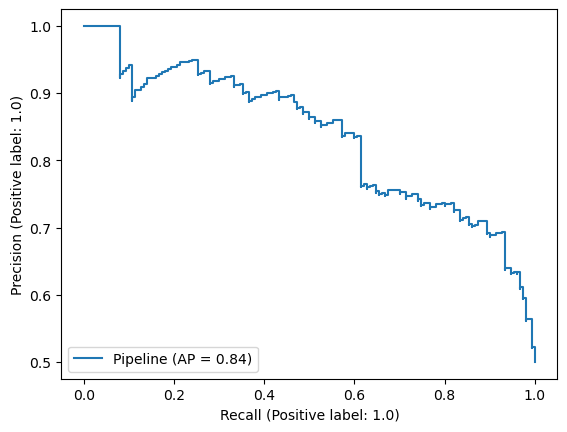

In [89]:
PrecisionRecallDisplay.from_estimator(model_poly, X_test_transf, y_test)

print(classification_report(y_test, y_predict))

In [40]:
from sklearn.metrics import precision_recall_curve

y_proba_1 = model_poly.predict_proba(X_test_transf)[:, 1]

# Obtendo as diferentes precisões e revocações
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_1)

# Inserindo os dados em um dataframe
precisions_recalls = pd.DataFrame(data={'precisions':precisions[:-1], 
                                        'recalls':recalls[:-1], 'thresholds':thresholds})

precisions_recalls

,precisions,recalls,thresholds
0,0.500000,1.000000,0.004074
1,0.501672,1.000000,0.014031
2,0.503356,1.000000,0.016077
3,0.505051,1.000000,0.024907
4,0.506757,1.000000,0.036103
...,...,...,...
258,1.000000,0.040000,0.976861
259,1.000000,0.026667,0.982232
260,1.000000,0.020000,0.982751
261,1.000000,0.013333,0.987016


In [41]:
precisions_recalls[precisions_recalls['precisions']>=0.8]

,precisions,recalls,thresholds
160,0.804511,0.713333,0.569521
161,0.801527,0.700000,0.573325
162,0.807692,0.700000,0.582891
163,0.813953,0.700000,0.588280
164,0.812500,0.693333,0.608251
...,...,...,...
258,1.000000,0.040000,0.976861
259,1.000000,0.026667,0.982232
260,1.000000,0.020000,0.982751
261,1.000000,0.013333,0.987016


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

_, _, thresholds = roc_curve(y_test, y_proba_1)
accuracy_scores = []
for thresh in thresholds:
    accuracy_scores.append(accuracy_score(y_test, [prob > thresh for prob in y_proba_1]))

accuracies = np.array(accuracy_scores)
max_accuracy = accuracies.max() 
max_accuracy_threshold =  thresholds[accuracies.argmax()]

print("Maior acurácia:", max_accuracy)
print("CutOff da respectiva acurácia:", max_accuracy_threshold)

Maior acurácia: 0.7733333333333333
CutOff da respectiva acurácia: 0.4034517523864632


In [43]:
# CutOff que retorna a mesma precisão e mesma revocação

precision_recall = precisions_recalls[precisions_recalls['precisions']==precisions_recalls['recalls']]
precision_recall.rename(columns={'precisions': 'Precision', 'recalls': 'Recall', 'thresholds': 'CufOff'})

,Precision,Recall,CufOff
144,0.753333,0.753333,0.51691


Avaliando os modelos, pudemos verificar que o *score* do modelo com polinômios foi levemente menor.

Considerando a classe de interesse como a classe 1, ou seja, para quando a pessoa tem diabetes, o modelo com polinômios também teve uma precisão e acurácia menor, apesar da revocação ter ficado mais alta.

Ainda, avaliando a maior acurácia entre os modelos, o modelo com polinômios também não conseguiu atingir a mesma taxa de acurácia (apesar de a diferença ser ridicularmente pequena).

Poderíamos verificar outras formas de abordar o problema. Por exemplo, se o nosso objetivo seja prever todas as pessoas que tem diabetes, poderíamos buscar por cutoffs com uma precisão maior, mesmo que ele viesse a acabar prevendo mais pessoas que não tem diabetes, mas tudo dependeria do escopo do problema.